# Logistic Regression

In [1]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
import warnings
warnings.filterwarnings('ignore')

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


In [2]:
#Loading the data set
raw_data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\2.01. Admittance.csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
#Declaring the variables
y = data['Admitted']
x1 = data['SAT']

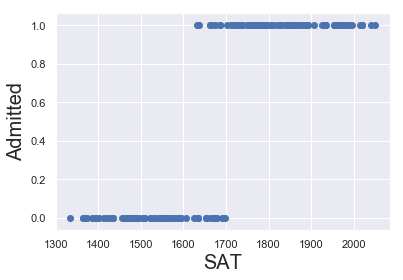

In [5]:
# Plotting the data with a scatter plot
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

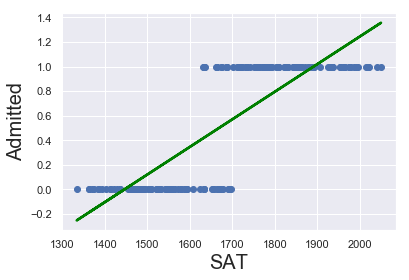

In [6]:
# Plotting the data with a regression line
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color='C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1, y_hat, lw=2.5, color='green')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

#### Note - Linear Regression is the simplest non-trivial relationship

## Plotting with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


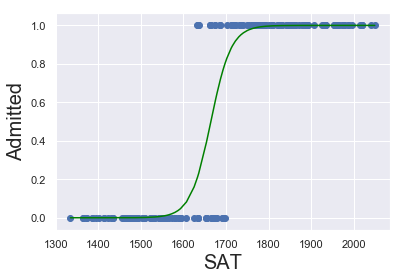

In [13]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='green')
plt.show()

## Logit vs Logistics Regression Model

###### Note - 𝑝(X)/1 −𝑝(X)= 𝑒(β0+β1X1+…+βkXk)    - Logistics Model
###### log (𝑝(X)/1 −𝑝(X)) = β0 + β1𝑥 + ⋯ β𝑘𝑥      - Logit Model

In [19]:
# Printing the summary table 
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.7992
Time:                        03:53:17   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

###### MLE - Maximum Likelihood Estimation (the higher the MLE, the higher the probability of the model being correct), Log-Likelihood, LL-Null, LLR p-value, Pseudo R squared (b/w 0.2 to 0.4)

## Binary Predictors in a Logistic Regression

In [20]:
#Loading the data set
raw_data = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\2.02. Binary predictors.csv")
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [22]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [23]:
#Declaring the variables
y = data['Admitted']
x1 = data['Gender']

In [24]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.1659
Time:                        04:12:22   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [26]:
###### log(odds)= -0.64+2.08*Gender
###### log(odds2)= -0.64+2.08*Gender2  
###### log(odds1)= -0.64+2.08*Gender1
###### log(odds2) - log(odds1) = 2.08(Gender2 - Gender1)
###### log(odds2 - odds1) = 2.08(Gender2 - Gender1)
###### log(odds(female) - odds(male) = 2.08(1 - 0)
###### log(odds(female) - odds(male) = 2.08

In [28]:
np.exp(2.0786)

7.993270498536442

###### odds(female) = 7.99 * odds(male)

In [29]:
### Using both the independent variables
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [30]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:                  0.8249
Time:                        04:21:13   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

###### This regression summary table has a much higher log-Likelihood than the previous with only Gender attribuet

In [31]:
np.exp(1.9449)

6.992932526814459

## Accuracy of the model

In [33]:
#Predicted values by the model
np.set_printoptions(formatter={'float':lambda x : "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [34]:
#Actual values from the data set
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [35]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [40]:
# Creating a confuion matrix for our model
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


###### The model predicted 0 for 69 observations and 1 for 90 observations. The total of 159 observations predicted are correct and the rest 9 of them are incorrect. The accuracy of the model is 159/168 = 0.946 === 94.6% accuracy.

In [43]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()* 100
accuracy_train

94.64285714285714

## Testing the model and assessing its accuracy 

In [48]:
test = pd.read_csv(r"C:\Users\gunjans648\Desktop\Datasets\2.03. Test dataset.csv")
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [49]:
test['Admitted'] = test['Admitted'].map({'Yes':1, 'No':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [51]:
x.head()

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [54]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [58]:
#data is a dataframe formatted in a same way as your input data (without the actual values)
#actual_values are the actual values from the test data

def confusion_matrix(data, actual_values, model):
    
    #Predict the values using the Logit model
    pred_values = model.predict(data)
    #Specify the bins
    bins = np.array([0,0.5,1])
    #Creating a histogram - if the values fall b/w 0-0.5 will be considered 0 and if it falls b/w 0.5-1, will be considered 1
    cm =np.histogram2d(actual_values, pred_values, bins=bins)[0]
    #Accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    
    return cm, accuracy

In [61]:
cm = confusion_matrix(test_data, test_actual, results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]), 0.8947368421052632)

In [63]:
# Creating a confuion matrix for our model
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [65]:
print('Missclassification rate : '+str((1+1)/19))

Missclassification rate : 0.10526315789473684
